In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 1. Строка names содержит имена в формате 'Name1 Surname1, Name2 Surname2, …'.
# Поместите в переменную names_list список со строками имён – ['Name1 Surname1', 'Name2 Surname2', …]

In [3]:
names = 'Name1 Surname1, Name2 Surname2, Name3 Surname3, Name4 Surname4, Name5 Surname5, Name6 Surname6'

In [4]:
names_list = names.split(', ')

In [5]:
names_list

['Name1 Surname1',
 'Name2 Surname2',
 'Name3 Surname3',
 'Name4 Surname4',
 'Name5 Surname5',
 'Name6 Surname6']

In [6]:
# 2. В переменной df содержатся данные следующего вида:
#    Отберите из них только те, где wealth принимает значение 'medium', 
#    а возраст составляет больше 35. Поместите результат в переменную medium_35.

In [7]:
data_2 = {'client_id':[9002, 6722, 8799, 8737, 5208], 
          'sex':[1, 1, 1, 0, 0], 
          'wealth':['medium', 'high', 'high', 'low', 'medium'], 
          'age':[63, 54, 62, 54, 37]}
df_2 = pd.DataFrame(data_2)

In [8]:
df_2

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


In [9]:
df_2.query("wealth == 'medium' & age > 35")

,client_id,sex,wealth,age
0,9002,1,medium,63
4,5208,0,medium,37


In [10]:
df_2[(df_2.wealth == 'medium') & (df_2.age > 35)]

,client_id,sex,wealth,age
0,9002,1,medium,63
4,5208,0,medium,37


In [11]:
# 3. Ваш коллега-новичок перепутал названия колонок в таблице df из предыдущих заданий и прислал вам такой вариант:
#    Воспользуйтесь методом rename и приведите таблицу к более каноничному виду, сохранив её в ту же самую переменную df.

In [12]:
data_3_wrong = {'Клиент id':[9002, 6722, 8799, 8737, 5208], 
          'Пол':[1, 1, 1, 0, 0], 
          'Благосостояние':['medium', 'high', 'high', 'low', 'medium'], 
          'Возраст':[63, 54, 62, 54, 37]}
df_3_wrong = pd.DataFrame(data_3_wrong)

In [13]:
df_3_wrong

,Клиент id,Пол,Благосостояние,Возраст
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


In [14]:
df_3 = df_3_wrong.rename(columns={'Клиент id':'client_id', 'Пол':'sex', 'Благосостояние':'wealth', 'Возраст':'age'})

In [15]:
df_3

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


In [16]:
df_3.columns = ['client_id', 'sex', 'wealth', 'age']

In [17]:
df_3

,client_id,sex,wealth,age
0,9002,1,medium,63
1,6722,1,high,54
2,8799,1,high,62
3,8737,0,low,54
4,5208,0,medium,37


In [18]:
# 4. Добавьте в исследуемый нами датафрэйм df колонку older_than_30, в которой будет храниться информация о том, 
# старше ли клиент 30 лет или нет (булиновское значение).

In [19]:
df_3['older_than_30'] = df_3['age'] > 30

In [20]:
df_3

,client_id,sex,wealth,age,older_than_30
0,9002,1,medium,63,True
1,6722,1,high,54,True
2,8799,1,high,62,True
3,8737,0,low,54,True
4,5208,0,medium,37,True


In [21]:
# 5. А теперь получите серию с числом уникальных значений для каждой колонки и присвойте её переменной unique_num

In [22]:
unique_num = df_3.nunique()

In [23]:
unique_num

client_id        5
sex              2
wealth           3
age              4
older_than_30    1
dtype: int64

In [24]:
# 6. У нас появились новые данные! Переменная data хранит в себе датафрейм следующего вида:
#    Проведите inner join датафрейма data с df из предыдущего шага, объединив их по колонке client_id, и 
#    поместите результат в переменную full_data (да, придумывать переменные иногда бывает сложно).

In [25]:
data_6 = {'client_id':[5392, 9581, 7250, 8619, 6573], 
          'amount':[42331, 88420, 1714, 80572, 57549], 
          'date':[1585425830, 1585429536, 1585427761, 1585427077, 1585426290]}
df_6 = pd.DataFrame(data_6)

In [26]:
df_6

,client_id,amount,date
0,5392,42331,1585425830
1,9581,88420,1585429536
2,7250,1714,1585427761
3,8619,80572,1585427077
4,6573,57549,1585426290


In [33]:
df_3.client_id

0    9002
1    6722
2    8799
3    8737
4    5208
Name: client_id, dtype: int64

In [27]:
full_data = df_6.merge(df_3, how='inner', on='client_id')

In [31]:
full_data

,client_id,amount,date,sex,wealth,age,older_than_30


In [29]:
# 7. А теперь создадим свою собственную функцию! Напишите функцию read_n_agg, которая:
# принимает на вход один параметр – путь к файлу
# считывает переданный файл, в котором разделителем является ;
# считает средний заработок (income) по каждой компании (company), перенося колонку company в индекс (as_index=True)
# возвращает результат этих действий (агрегированный датафрэйм)

In [35]:
df_7 = pd.read_csv(r'#####\companies.csv', sep = ";")

In [36]:
df_7.head()

,company,income,date
0,"ЗАО «Доронин, Колобов и Калашникова»",1221331958,2019-09-09
1,ООО «Авдеев»,21116804375,1972-12-21
2,РАО «Аксенов Сорокина»,79257158759,2007-03-05
3,Ларионов Инкорпорэйтед,36799366126,2011-08-11
4,Григорьев Инкорпорэйтед,48201837498,1989-09-02


In [37]:
df_7.groupby('company').agg({'income':'mean'}).head()

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10


In [39]:
def read_n_agg(data_file):
    df = pd.read_csv(data_file, sep = ";")
    df_agg = df.groupby('company').agg({'income':'mean'})
    return df_agg

In [40]:
read_n_agg(r'#####\companies.csv')

,income
company,
En +,9.962187e+10
"АО «Александрова, Савельев и Мельникова»",7.206782e+10
АО «Андреев-Анисимов»,6.931948e+09
АО «Андреев-Макарова»,8.934380e+10
АО «Большаков Кошелева»,7.860861e+10
...,...
Щекиноазот,4.309092e+10
Щукин Лимитед,6.703036e+10
Эйвон Бьюти Продактс Компани (Avon),2.503657e+10


In [ ]:
# 8. Загрузите датасет, используя ; в качестве разделителя. 
# Также укажите, что столбцы start_at, end_at, arrived_at нужно прочитать как даты (параметр parse_dates). 
# Результат запишите в taxi.

In [42]:
taxi = pd.read_csv(r'#####\taxi_peru.csv', 
                   sep = ';', 
                   parse_dates = ['start_at', 'end_at', 'arrived_at'])

In [43]:
taxi.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [ ]:
# 9.
# Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [48]:
orders_by_source = taxi.groupby('source', as_index=False).agg({'journey_id':'count'}).rename(columns={'journey_id':'num_orders'})

In [49]:
orders_by_source

,source,num_orders
0,Android,4909
1,Wap,136
2,iPad,571
3,iPhone,9741
4,web,7631


In [51]:
# Total orders
taxi.shape[0]

23111

In [57]:
orders_by_source = round((orders_by_source['num_orders'] / taxi.shape[0]) * 100, 0)

In [66]:
orders_percent_by_source = orders_percent_by_source.astype(int)
orders_percent_by_source

0    21
1     1
2     2
3    42
4    33
Name: num_orders, dtype: int32

In [76]:
orders_by_source['orders_percent_by_source'] = round(((orders_by_source['num_orders'] / taxi.shape[0])*100), 0)

In [77]:
orders_by_source

,source,num_orders,orders_percent_by_source
0,Android,4909,21.0
1,Wap,136,1.0
2,iPad,571,2.0
3,iPhone,9741,42.0
4,web,7631,33.0


In [63]:
# OR

In [79]:
taxi.source.value_counts(normalize=True).round(2)*100

iPhone     42.0
web        33.0
Android    21.0
iPad        2.0
Wap         1.0
Name: source, dtype: float64

In [ ]:
# 10.
# Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:
# 1) Посчитайте частоту встречаемости каждой из оценок
# 2) Переведите в проценты и округлите до 2 знаков после точки (.mul(100).round(2))
# 3) Сбросьте индексы
# 4) Переименуйте колонки в driver_score и percentage
# 5) Отсортируйте по driver_score в порядке возрастания (от 0 до 5)
# 6) Запишите результат в driver_score_counts

In [94]:
driver_score_counts = taxi.driver_score \
        .value_counts(normalize=True) \
        .mul(100).round(2) \
        .reset_index() \
        .rename(columns={'index':'driver_score', 'driver_score':'percentage'}) \
        .sort_values('driver_score')

In [95]:
driver_score_counts

,driver_score,percentage
2,0.0,14.30
4,1.0,1.23
5,2.0,0.81
3,3.0,2.97
1,4.0,21.88
0,5.0,58.81


In [ ]:
# 11. 
# Теперь строим график!

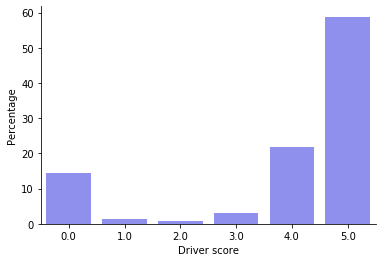

In [96]:
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

In [ ]:
# 12. 
# Проверим, как распределены оценки клиентов водителями (rider_score).

In [106]:
rider_score_counts = (taxi
                      .rider_score
                      .value_counts(normalize=True)
                      .mul(100).round(2)
                      .reset_index()
                      .rename(columns={'index':'rider_score', 'rider_score':'percentage'})
                      .sort_values('rider_score')
                     )

In [107]:
rider_score_counts

,rider_score,percentage
2,0.0,2.29
4,1.0,0.21
5,2.0,0.19
3,3.0,1.38
1,4.0,8.83
0,5.0,87.10


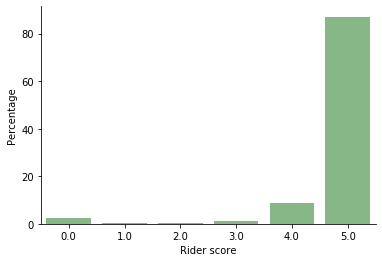

In [108]:
ax_rider = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='green', alpha=0.5)
ax_rider.set(xlabel='Rider score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика